These exercises are not required to complete however are good to do for practice. (Not to be submitted on git)

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

# Exercises (Optional)

In [24]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a[3:6]
# reverse the list
a.reverse()
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
new = [x**2 for x in a]
new.reverse()
new

[1, 4, 9, 16, 25, 36]

In [37]:
# create a numpy array from this list
import numpy as np
a.reverse
b = np.array(a)

In [38]:
# find the mean of b
np.mean(b)

3.5

In [40]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([36, 25, 16,  9,  4,  1])

In [67]:
# change b from a length-6 list to a 2x3 matrix
import numpy as np
a = [1,2,3,4,5,6]
b = np.array(a)
m = b.reshape(2, 3)
m


array([[1, 2, 3],
       [4, 5, 6]])

In [72]:
# find the mean value of each row
[np.mean(row) for row in m]

[2.0, 5.0]

In [75]:
# find the mean value of each column
[np.mean([row[icol] for row in m]) for icol in range(len(m[0]))]

[2.5, 3.5, 4.5]

In [79]:
# find the third column of b
for row in range(len(m)):
    print(m[row][2])

3
6


In [81]:
# load in the "starbucks.csv" dataset
import pandas as pd
df = pd.read_csv("../data/starbucks.csv")

In [82]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df["calories"].mean()

193.87190082644628

In [87]:
# how many different categories of beverages are there?
len(df["beverage"].unique())

33

In [97]:
# what is the average # calories for each beverage category?

mfrs = df.groupby("beverage_category")
mfrs["calories"].mean()        

beverage_category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended crme            233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               114.444444
signature espresso drinks           250.000000
smoothies                           282.222222
tazo tea drinks                     177.307692
Name: calories, dtype: float64

In [125]:
# what beverage preparation includes the most sugar on average?

mfrs = df.groupby("beverage_prep")["sugars"].mean()
mfrs.sort_values(ascending=False)


beverage_prep
Whole Milk            55.687500
Venti Nonfat Milk     50.045455
Grande Nonfat Milk    38.615385
Soymilk               31.848485
2% Milk               30.980000
Tall Nonfat Milk      28.521739
Venti                 27.714286
Grande                20.000000
Short Nonfat Milk     17.000000
Tall                  14.714286
Short                  8.250000
Doppio                 0.000000
Solo                   0.000000
Name: sugars, dtype: float64

In [131]:
# what is the average % daily value calcium content for each beverage?

mfrs = df.groupby("beverage")["calcium"].mean()
mfrs/1.3

beverage
banana chocolate smoothie                             15.384615
brewed coffee                                          0.384615
caff americano                                         1.153846
caff latte                                            26.923077
caff mocha (without whipped cream)                    23.076923
cappuccino                                            17.307692
caramel                                                8.461538
caramel (without whipped cream)                        9.230769
caramel apple spice (without whipped cream)            0.000000
caramel macchiato                                     21.794872
coffee                                                 9.487179
espresso                                               0.000000
hot chocolate (without whipped cream)                 26.923077
iced brewed coffee (with classic syrup)                0.000000
iced brewed coffee (with milk  classic syrup)          6.153846
java chip                      

In [162]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay

df["Difference"] = df["protein"] - df["calories"]
mfrs = df.groupby("beverage")
mfrs[["calories", "protein", "Difference"]].agg({"calories": "min", "protein": "max", "Difference": "mean"})
df.head()

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine,Difference
0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0,-2.7
1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0,-3.5
2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0,-4.0
3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0,-4.0
4,classic espresso drinks,caff latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0,-64.0


<AxesSubplot:ylabel='Frequency'>

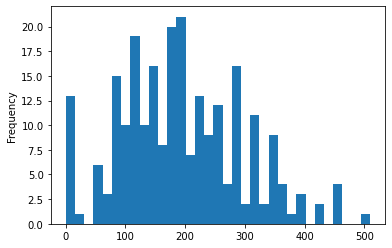

In [164]:
# plot the distribution of the number of calories in drinks using matplotlib

import matplotlib.pyplot as plt

df["calories"].plot.hist(bins=len(df["beverage"].unique()))



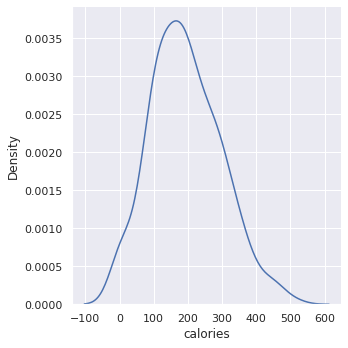

In [167]:
# plot the same distribution using seaborn. what about a density plot instead?

import seaborn as sns
sns.set()  # sets settings

sns.displot(data=df, x="calories", kind="kde")


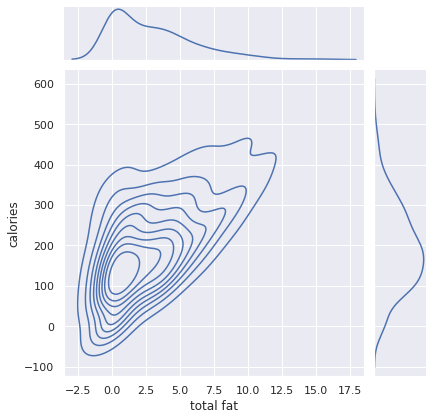

In [171]:
# plot calories against total fat using seaborn

sns.jointplot(data=df, x="total fat", y="calories", kind="kde")


array([[<AxesSubplot:title={'center':'2% Milk'}>,
        <AxesSubplot:title={'center':'Doppio'}>,
        <AxesSubplot:title={'center':'Grande'}>,
        <AxesSubplot:title={'center':'Grande Nonfat Milk'}>],
       [<AxesSubplot:title={'center':'Short'}>,
        <AxesSubplot:title={'center':'Short Nonfat Milk'}>,
        <AxesSubplot:title={'center':'Solo'}>,
        <AxesSubplot:title={'center':'Soymilk'}>],
       [<AxesSubplot:title={'center':'Tall'}>,
        <AxesSubplot:title={'center':'Tall Nonfat Milk'}>,
        <AxesSubplot:title={'center':'Venti'}>,
        <AxesSubplot:title={'center':'Venti Nonfat Milk'}>],
       [<AxesSubplot:title={'center':'Whole Milk'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

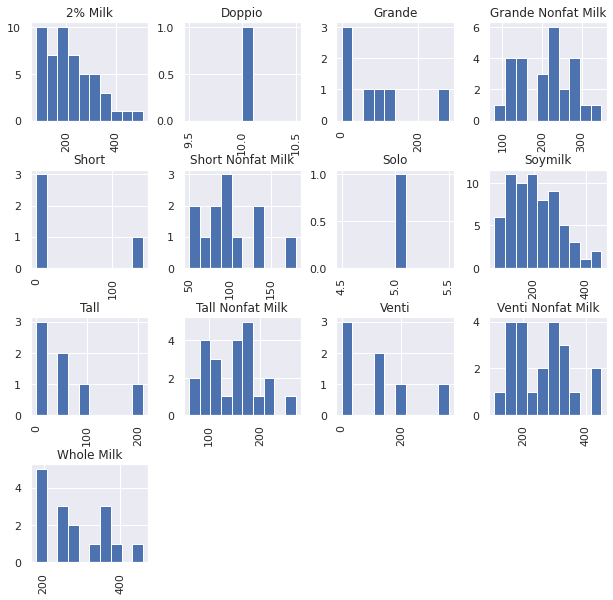

In [181]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

df["calories"].hist(by=df["beverage_prep"], figsize=(10,10))
